# ToolKit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing & Inspecting Data

In [2]:
df = pd.read_excel('startup-expansion.xlsx')

In [3]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [6]:
df[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


# Preprocessing Data

In [7]:
df['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [8]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [10]:
df['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [12]:
df['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [15]:
df['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [22]:
df.duplicated().sum()

0

# Exploring & Analysing Data

In [23]:
df.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
107,108,Fayetteville,North Carolina,Region 1,Old,3020,51229
34,35,Huntsville,Alabama,Region 1,Old,3335,59283
50,51,Akron,Ohio,Region 1,Old,2338,50364
121,122,Mobile,Alabama,Region 1,Old,2838,49290
131,132,West Jordan,Utah,Region 2,Old,2773,21056
37,38,Oxnard,California,Region 2,Old,2318,64302
29,30,Edison,New Jersey,Region 1,Old,3131,22972
23,24,Burbank,California,Region 2,Old,3679,20123
62,63,Richmond,California,Region 2,Old,3924,19448
26,27,Elizabeth,New Jersey,Region 1,Old,2557,45017


<AxesSubplot:>

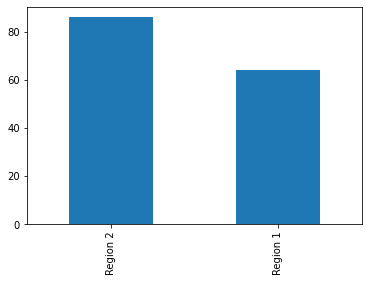

In [27]:
df['Sales Region'].value_counts().plot.bar()

In [29]:
df.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [30]:
df[df['New Expansion'] == 'New']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357
141,142,Tempe,Arizona,Region 2,New,2911,48954
142,143,Joliet,Illinois,Region 1,New,3279,48315
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366
144,145,Glendale,California,Region 2,New,2363,49376
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457
149,150,Thousand Oaks,California,Region 2,New,2431,40141


In [38]:
df[df['New Expansion'] == 'Old'].groupby('State').max()['Revenue'].nlargest(10)

State
Arkansas         68828
Michigan         65475
New York         64906
California       64302
Rhode Island     62337
Alabama          60338
Kansas           59887
Massachusetts    59840
Washington       58951
Virginia         57625
Name: Revenue, dtype: int64

In [37]:
df[df['New Expansion'] == 'New'].groupby('State').max()['Revenue'].nlargest(10)

State
Texas         63148
Tennessee     55357
California    52366
Arizona       48954
Illinois      48315
New Jersey    34603
Name: Revenue, dtype: int64

In [40]:
df['Profit'] = df['Revenue'] - df['Marketing Spend']

In [41]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [43]:
df['ROMS'] = round((df['Profit'] / df['Marketing Spend'])*100,2)

In [45]:
df['ROMS%'] = (df['ROMS'] / 100)
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [50]:
df.to_csv('startup-expansion-modified.csv')